In [4]:
import sqlite3
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import community
import numpy as np

In [16]:
def display_graph(db_file, degree_centrality_threshold):
    # Connect to the database file
    conn = sqlite3.connect(db_file)
    c = conn.cursor()
    
    G = nx.Graph()
    
    # Get all the contacts from the database
    c.execute("SELECT * FROM contacts")
    contacts = c.fetchall()

    # Add the contacts as nodes to the graph
    for contact in contacts:
        G.add_node(contact[0], name=contact[1] + ' ' + contact[2], location=contact[6], hobby = contact[4])

    # Get all the connections from the database
    c.execute("SELECT * FROM connections")
    connections = c.fetchall()
    

    # Add the connections as edges to the graph
    for connection in connections:
        G.add_edge(connection[0], connection[1])

    # Compute the centrality measures
    degree_centrality = nx.degree_centrality(G)

    # Remove the nodes that have a degree centrality below the threshold
    nodes_to_remove = [node for node in degree_centrality if degree_centrality[node] < degree_centrality_threshold]
    G.remove_nodes_from(nodes_to_remove)
    

    # Create the node trace
    node_trace = go.Scatter3d(x=[], y=[], z=[], text=[], mode='markers',
                              marker=dict(size=5, colorscale='YlGn', 
                                          colorbar=dict(thickness=15, title='Node Connections',xanchor='left', titleside='right'),
                                          line_width=4))

    # Get the node coordinates
    pos = nx.spring_layout(G, dim=3)

    # Fill in the node trace
    for node in G.nodes():
        x, y, z = pos[node]
        node_trace['x'] += tuple([x])
        node_trace['y'] += tuple([y])
        node_trace['z'] += tuple([z])
        node_trace['text'] += tuple([G.nodes[node]['name'] + '<br>' + G.nodes[node]['hobby']])
        

    
    edge_trace =  go.Scatter3d(x=[], y=[], z=[], line=dict(width=2, color='green'), mode='lines')
    edge_x, edge_y, edge_z = [], [], []
    x0, y0, z0 = [], [], []
    
    for edge in G.edges():
        x0, y0, z0 = pos[edge[0]]
        x1, y1, z1 = pos[edge[1]]
        edge_trace['x'] += tuple([x0, x1, None])
        edge_trace['y'] += tuple([y0, y1, None])
        edge_trace['z'] += tuple([z0, z1, None])
    
    node_adjacencies = []
    node_text = []
    
    for node, adjacencies in enumerate(G.adjacency()):
        node_adjacencies.append(len(adjacencies[1]))
        node_text.append('Name: '+ str(adjacencies[0])+ ' # of connections: '+str(len(adjacencies[1])))

    node_trace.marker.color = node_adjacencies
    node_trace.text = node_text

    fig = go.Figure(data=[edge_trace, node_trace], 
                    layout=go.Layout(title='<br>Network graph made with Networkx and Plotly', titlefont_size=16,
                                                                    showlegend=False, margin=dict(b=20,l=5,r=5,t=40),
                                                                    ))

    fig.update_layout(scene = dict(
                    xaxis = dict(
                         backgroundcolor="#FFFFFF",
                         gridcolor="black",
                         showbackground=True,
                         zerolinecolor="black",),
                    yaxis = dict(
                        backgroundcolor="#FFFFFF",
                        gridcolor="black",
                        showbackground=True,
                        zerolinecolor="black"),
                    zaxis = dict(
                        backgroundcolor="#FFFFFF",
                        gridcolor="black",
                        showbackground=True,
                        zerolinecolor="black",),),
                    width=700,
                    margin=dict(
                    r=10, l=10,
                    b=10, t=10)
                  )
    fig.show()


☎️ Call the function on the database and set a threshold

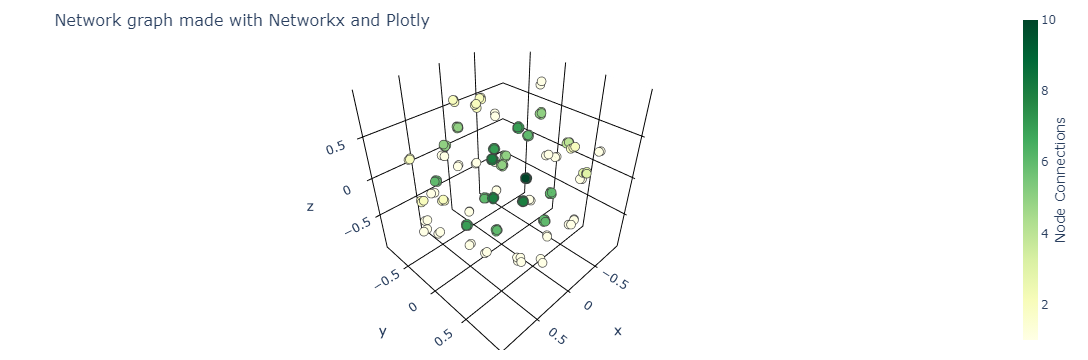

In [17]:
display_graph('../raw_data/network.db', 0.001)